In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Objective : To estimate angular velocity of the DC Motor with Voltage as the control inputs from the real data of motor at 400 rpm.
The motor takes voltage from 0 to 1 V.


dynamic motor model

$\dot{w}=1/J*(k_m*i-b*w-b*w)$

$\dot{i}=1/L_a*(Volt-k_b*w-R_a*i)$

w and i as states

In [155]:
#parameters of the motor
k_m = 0.066 # Torque constant
k_b = k_m * 0.03    # Back EMF coefficient
L_a = 112e-6 # Armature inductance
R_a = 60e-5    # Armature resistance
Gear_ratio=1
b=0.01
J=0.0001675*2
wheel_friction = 0.02
dt = 0.0005

In [156]:
#constants for matrice F
A = 1 - dt*b/J
B = dt*k_m/J
C = -k_b*dt/L_a
D = 1 - dt*R_a/L_a

In [157]:
file='wheel400.csv'                               #name of the file
path='/home/sonam/Downloads/wheel400.csv'          #address of the csv file

#data = [row.split(',') for row in fo.readlines()]
#data = [map(float, row) for row in data]


data_frame = pd.read_csv(path,delimiter=' ')

omega = data_frame.iloc[40:,4].as_matrix()         #taking entire column of angular velocity except for the first 40 points
gamma =  data_frame.iloc[40:,2].as_matrix()        #taking entire column of voltage change(from 0 to one) except for the first 40 points

In [158]:
#processing 
V = []
for i in range(len(gamma)):

    xi = 10000 - gamma[i]
    y = float(xi)
    yi = y/10000
    V.append(yi)


In [159]:
#values of angular velocity from the motor ...Z observation
for i in range(len(omega)):
    omega_radians = omega*(2*np.pi/60)
    omega_radians = omega_radians.reshape(-1,1)
#     print omega_radians

#state = np.hstack([omega_radians,np.zeros(omega_radians.shape)])

In [160]:
n = len(omega_radians)
v1 = 2     #variance for volts
v2 = 10   #variance for omega


In [161]:
F = np.array([[A,B],[C,D]])
G = np.array([[-dt/J,0],[0,dt/L_a]]).reshape(2,2)

print F

for i in range(n):
    
    U = np.array([10, V[i]]).reshape(2,1)
    

[[ 0.98507463  0.09850746]
 [-0.00883929  0.99732143]]


In [162]:
z_ob = omega_radians
print z_ob

[[64.08849013]
 [60.52801846]
 [60.52801846]
 ...
 [38.9557489 ]
 [38.9557489 ]
 [38.9557489 ]]


In [163]:
#applying kalman filter

#initializing P 
P = np.array([[100,0],[0,100]])


x_est = []
Q = np.array([[1,0],[0,1]])
R = np.array(200).reshape(1,1)

H = np.array([1,0]).reshape(1,2) 
x = np.array([1,0]).reshape(2,1)


for i in range(n):
    #predict steps:
    x = np.dot(F,x) + np.dot(G,[[10], [V[i]]]) 
    z = np.dot(H,x) 
    
    #update steps:
    P = np.dot(F,np.dot(P,F.T)) + Q
    
    S = np.dot(H,np.dot(P,H.T)) + R

    K = np.dot(P,np.dot(H.T,np.linalg.inv(S)))
    
    P = np.dot((np.eye(2) - np.dot(K,H)),P)
    
    x = x + np.dot(K,(z_ob[i]-z))
    
   
    
    x_est.append(x.tolist())

#print np.asarray(x_pred).shape
xest1 = [k[0][0] for k in x_est]
#print (xest1)
# print(Q,R)

<IPython.core.display.Javascript object>


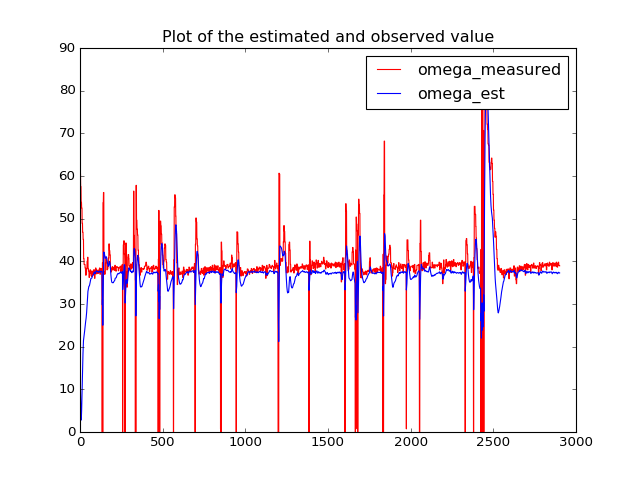

In [169]:
plt.figure()
plt.title("Plot of the estimated and observed value")
plt.plot(z_ob, label = "omega_measured",c='r')
plt.plot(xest1,label="omega_est")
plt.legend()
plt.show()

In [166]:
#checking rms values for the data set
s = np.square(z_ob - 40.94)
t = np.sum(s)
r = t/n
rms = np.sqrt(r)
print(rms)

#checking rms values for the filtered set
sf = np.square(np.array(xest1) - 40.94)
tf = np.sum(sf)
rf = tf/n
rmsf = np.sqrt(rf)
print(rmsf)
#plt.plot(xest1-z_ob)
#plt.show


8.189195563698707
6.623528292363603
